In [1]:
from __future__ import absolute_import, division, print_function

In [2]:
import tensorflow as tf
import numpy as np
rng = np.random

In [3]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [4]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])
n_samples = X.shape[0] #number of rows

In [6]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_sum(tf.pow(y_pred-y_true, 2)) / (2 * n_samples)

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [7]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [8]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.212132, W: 0.460100, b: -0.679121
step: 100, loss: 0.196669, W: 0.447817, b: -0.592040
step: 150, loss: 0.182974, W: 0.436258, b: -0.510090
step: 200, loss: 0.170845, W: 0.425379, b: -0.432969
step: 250, loss: 0.160104, W: 0.415142, b: -0.360391
step: 300, loss: 0.150591, W: 0.405508, b: -0.292091
step: 350, loss: 0.142167, W: 0.396442, b: -0.227814
step: 400, loss: 0.134705, W: 0.387910, b: -0.167325
step: 450, loss: 0.128097, W: 0.379880, b: -0.110400
step: 500, loss: 0.122245, W: 0.372324, b: -0.056828
step: 550, loss: 0.117062, W: 0.365213, b: -0.006414
step: 600, loss: 0.112472, W: 0.358521, b: 0.041030
step: 650, loss: 0.108407, W: 0.352223, b: 0.085679
step: 700, loss: 0.104807, W: 0.346296, b: 0.127697
step: 750, loss: 0.101619, W: 0.340718, b: 0.167239
step: 800, loss: 0.098795, W: 0.335470, b: 0.204452
step: 850, loss: 0.096294, W: 0.330530, b: 0.239471
step: 900, loss: 0.094079, W: 0.325881, b: 0.272428
step: 950, loss: 0.092118, W: 0.321507, b: 0.303442
st

In [9]:
import matplotlib.pyplot as plt

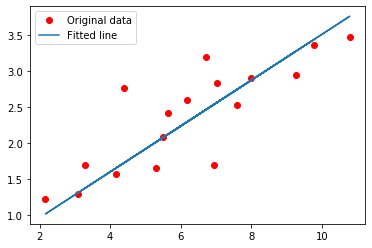

In [10]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()